<a href="https://colab.research.google.com/github/brijesh486/pandas_numpy_viz/blob/main/Time_Series_ARIMA%2C_SARIMAX.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.stattools import adfuller,acf,pacf
from statsmodels.tsa.arima.model import ARIMA
import statsmodels.tsa.api as smt

## ARIMA

In [3]:
air= pd.read_csv('Air Passengers.csv',index_col='Month',parse_dates=True)

In [4]:
air

,#Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121
...,...
1960-08-01,606
1960-09-01,508
1960-10-01,461


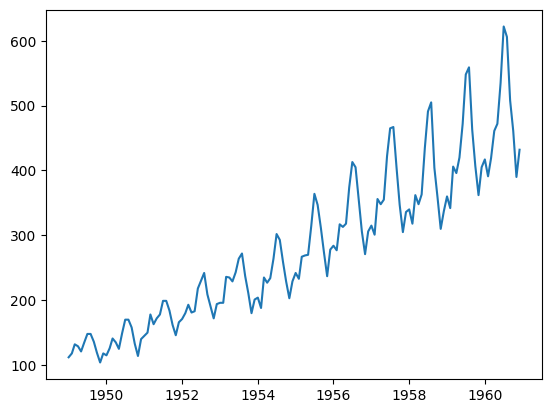

In [5]:
plt.plot(air)

In [6]:
def test_stationarity(timeseries):

    #Calculate rolling mean and rolling standard deviation
    rolmean = timeseries.rolling(window = 12).mean()
    rolstd = timeseries.rolling(window = 12).std()

    original = plt.plot(timeseries, color = 'blue', label = 'Original')
    mean = plt.plot(rolmean, color = 'red', label = 'Rolling Mean')
    std = plt.plot(rolstd, color = 'green', label = 'Rolling Std')
    plt.legend(loc='best')


    print('Results of Dickey-Fuller Test :\n')
    df_test = adfuller(timeseries)
    my_output = pd.Series(df_test[0:4], index =['Test Statistic', 'p-value', '#Lags Used', 'Number of Observations Used'])
    for i,j in df_test[4].items():
        my_output['Critical Value (%s)'%i] =j
    print(my_output)

Results of Dickey-Fuller Test :

Test Statistic                   0.815369
p-value                          0.991880
#Lags Used                      13.000000
Number of Observations Used    130.000000
Critical Value (1%)             -3.481682
Critical Value (5%)             -2.884042
Critical Value (10%)            -2.578770
dtype: float64


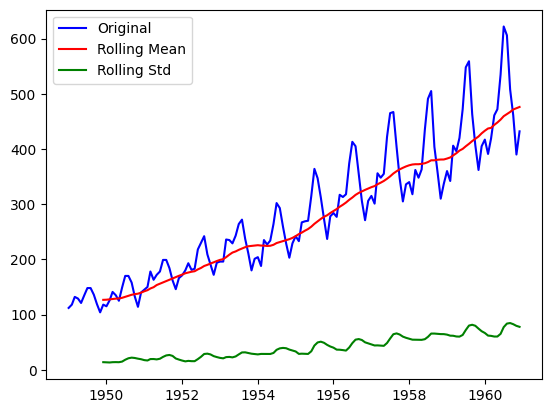

In [7]:
test_stationarity(air['#Passengers'])

### Differencing

In [8]:
air['Air_Diff']= air['#Passengers']-air['#Passengers'].shift(12)

In [9]:
air

,#Passengers,Air_Diff
Month,,
1949-01-01,112,NaN
1949-02-01,118,NaN
1949-03-01,132,NaN
1949-04-01,129,NaN
1949-05-01,121,NaN
...,...,...
1960-08-01,606,47.0
1960-09-01,508,45.0
1960-10-01,461,54.0


In [10]:
air.dropna(inplace=True)

In [11]:
air

,#Passengers,Air_Diff
Month,,
1950-01-01,115,3.0
1950-02-01,126,8.0
1950-03-01,141,9.0
1950-04-01,135,6.0
1950-05-01,125,4.0
...,...,...
1960-08-01,606,47.0
1960-09-01,508,45.0
1960-10-01,461,54.0


Results of Dickey-Fuller Test :

Test Statistic                  -3.383021
p-value                          0.011551
#Lags Used                       1.000000
Number of Observations Used    130.000000
Critical Value (1%)             -3.481682
Critical Value (5%)             -2.884042
Critical Value (10%)            -2.578770
dtype: float64


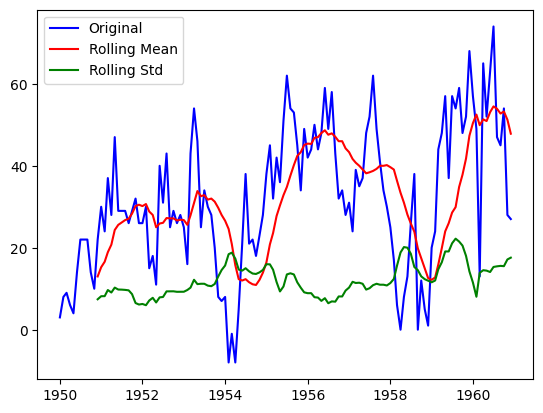

In [12]:
test_stationarity(air['Air_Diff'])

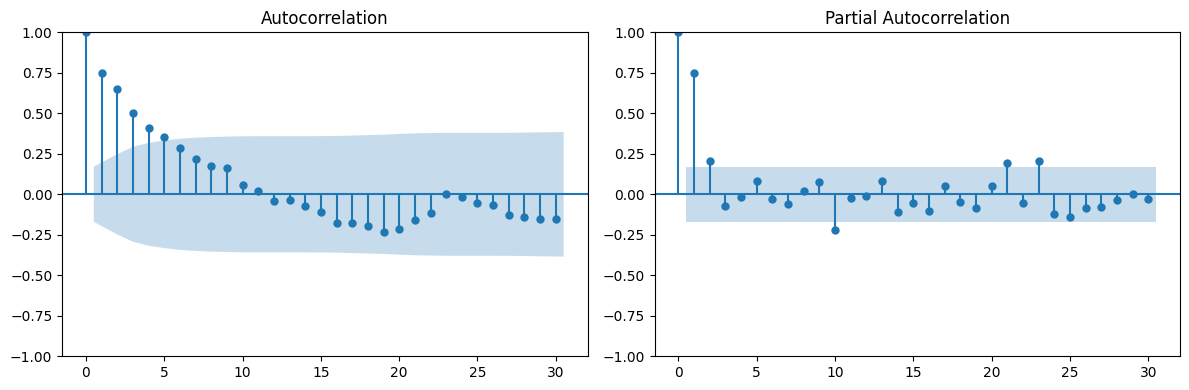

In [13]:
fig, axes = plt.subplots(1, 2)
fig.set_figwidth(12)
fig.set_figheight(4)
smt.graphics.plot_acf(air['Air_Diff'], lags=30, ax=axes[0])
smt.graphics.plot_pacf(air['Air_Diff'], lags=30, ax=axes[1])
plt.tight_layout()

In [14]:
import warnings
warnings.filterwarnings('ignore')
model = ARIMA(air['#Passengers'], order=(2,1,1))

In [15]:
air.columns

Index(['#Passengers', 'Air_Diff'], dtype='object')

In [16]:
result= model.fit()

In [17]:
result.predict()
result.forecast(20)

,predicted_mean
1961-01-01,470.955734
1961-02-01,492.939198
1961-03-01,497.878187
1961-04-01,492.511339
1961-05-01,484.232927
1961-06-01,477.819447
1961-07-01,474.867722
1961-08-01,474.783561
1961-09-01,476.136465
1961-10-01,477.655100


In [18]:
air['predicted']=result.predict()

In [19]:
forecast=result.forecast(20)
forecast

,predicted_mean
1961-01-01,470.955734
1961-02-01,492.939198
1961-03-01,497.878187
1961-04-01,492.511339
1961-05-01,484.232927
1961-06-01,477.819447
1961-07-01,474.867722
1961-08-01,474.783561
1961-09-01,476.136465
1961-10-01,477.655100


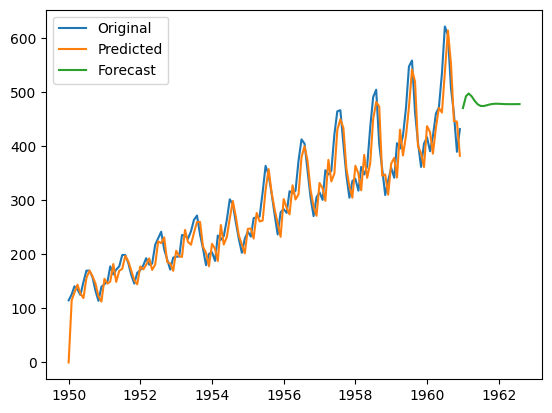

In [20]:
plt.plot(air['#Passengers'],label='Original')
plt.plot(air['predicted'],label='Predicted')
plt.plot(forecast,label='Forecast')
plt.legend()

##### SARIMAX

In [21]:
from statsmodels.tsa.statespace.sarimax import SARIMAX
Model= SARIMAX(air['#Passengers'],order=(1,1,1),seasonal_order=(1,1,1,12))
results1=Model.fit()
sar_pred= results1.predict()

In [22]:
sar_fore= results1.forecast(30)

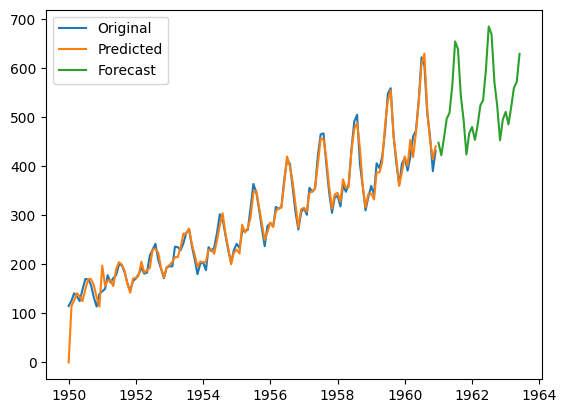

In [23]:
plt.plot(air['#Passengers'],label='Original')
plt.plot(sar_pred,label='Predicted')
plt.plot(sar_fore,label='Forecast')
plt.legend()